In [1]:
import gym
import json
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.sac.policies import MlpPolicy as MLPSACPolicy
from stable_baselines.common.policies import MlpLstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C, PPO2, SAC

import pandas as pd

import envs
from envs.kellycoinflip import KellyCoinflipEnv

%load_ext line_profiler

/Users/chris/anaconda3/envs/python3_tf1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/chris/anaconda3/envs/python3_tf1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/chris/anaconda3/envs/python3_tf1/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/chris/anaconda3/envs/pyt

In [27]:
# The algorithms require a vectorized environment to run
initial_wealth = 25.0
edge = 0.6
max_wealth = 250.0
max_rounds = 300
sparse_rewards = False
gamma = 0.99

env_init_fun = lambda : KellyCoinflipEnv(initial_wealth=initial_wealth, edge=edge, 
                                     max_wealth=max_wealth, max_rounds=max_rounds, sparse_rewards=sparse_rewards)
env = DummyVecEnv( [ env_init_fun ] )
model = SAC( MLPSACPolicy, env, verbose=1 )

total_timesteps = 1e3
model.learn(total_timesteps=int(total_timesteps) )

------------------------------------------
| current_lr              | 0.0003       |
| ent_coef                | 0.98570573   |
| ent_coef_loss           | -0.024652507 |
| entropy                 | 1.2866265    |
| episodes                | 4            |
| fps                     | 195          |
| mean 100 episode reward | -25          |
| n_updates               | 67           |
| policy_loss             | 16.751724    |
| qf1_loss                | 27.114536    |
| qf2_loss                | 23.87937     |
| time_elapsed            | 0            |
| total timesteps         | 167          |
| value_loss              | 2.2456675    |
------------------------------------------
-----------------------------------------
| current_lr              | 0.0003      |
| ent_coef                | 0.8705346   |
| ent_coef_loss           | -0.22962451 |
| entropy                 | 1.1187809   |
| episodes                | 8           |
| fps                     | 220         |
| mean 100 episode

In [35]:
model.learn(total_timesteps=int(1000) )

----------------------------------------
| current_lr              | 0.0003     |
| ent_coef                | 0.33858183 |
| ent_coef_loss           | -1.7502036 |
| entropy                 | 1.3763691  |
| episodes                | 4          |
| fps                     | 913        |
| mean 100 episode reward | 142        |
| n_updates               | 25         |
| policy_loss             | 3.790425   |
| qf1_loss                | 42.25429   |
| qf2_loss                | 40.940407  |
| time_elapsed            | 0          |
| total timesteps         | 125        |
| value_loss              | 0.33290198 |
----------------------------------------
----------------------------------------
| current_lr              | 0.0003     |
| ent_coef                | 0.28997743 |
| ent_coef_loss           | -2.0580356 |
| entropy                 | 1.2818705  |
| episodes                | 8          |
| fps                     | 307        |
| mean 100 episode reward | 46.4       |
| n_updates     

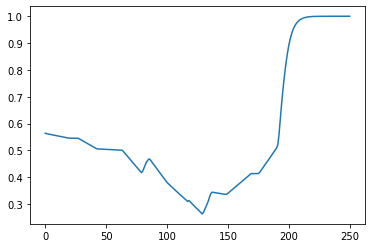

In [36]:
t = 150
vals = []
wealth_levels = np.arange(0, max_wealth + 0.01 )
for w in wealth_levels:
    state = np.array( [ w, t ], dtype=np.float32 )
    vals.append( model.predict(state) )
plt.plot(wealth_levels, vals )    

In [9]:
model.predict([1, 1])

(array([nan], dtype=float32), None)

In [14]:
def play_game(env, policy_func):
    obs = env.reset()
    tot_reward = 0
    done = False
    while not done:
        wealth = obs[0,0]
        action = policy_func(wealth)
        obs, reward, done, info = env.step([action])
        tot_reward += reward
    return tot_reward

In [15]:
gamma = 0.99
policy_func = lambda x : np.random.uniform(0,100)
play_game(env, policy_func=policy_func)

array([224.99902], dtype=float32)

In [26]:
gamma = 0.99
t = 300
policy_func = lambda w : model.predict( [w, t])[0]
play_game(env, policy_func=policy_func)

array([168.13692], dtype=float32)